In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('darkside')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
!pwd

/home/as111/sipm-analysis


# PEN Emission Spectrum

Pen spectrum integral = 1231637.2896555671+/-50.475802881643176


Text(0, 0.5, 'Intensity [$\\rm nm^{-1}$]')

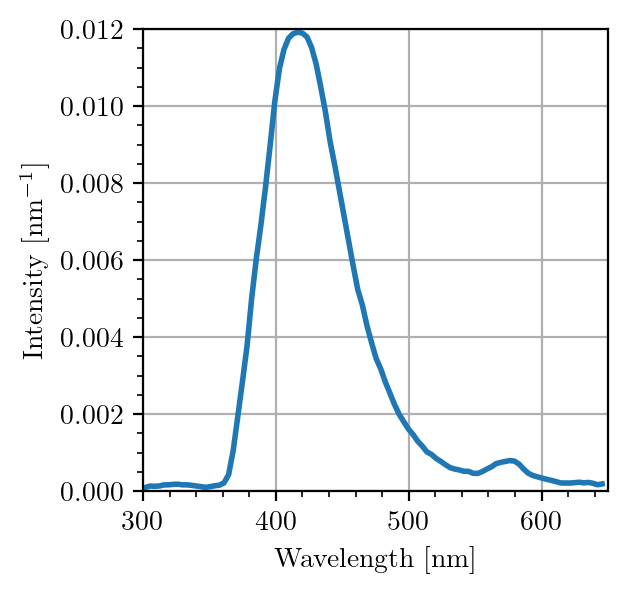

In [3]:
from scipy.interpolate import interp1d
import scipy.integrate as integrate

HC_eV = 1.2398420e-06
nm = 1e9
w_pen_rt = []
e_pen_rt = []
# From 2PAC G4DS
# Probably from https://iopscience.iop.org/article/10.1088/0022-3727/30/2/004/pdf
with open('data/pen_emission_spectrum.dat') as f:
    for line in f:
        data = line.split()
        w_pen_rt.append(HC_eV/float(data[0])*nm)
        e_pen_rt.append(float(data[1])*9000)

w_pen_93k = []
e_pen_93k = []
with open('data/pen_emission_spectrum_tempdep.dat') as f:
    for line in f:
        data = line.split()
        if(len(data)==0):
            break
        w_pen_93k.append(HC_eV/float(data[0])*nm)
        e_pen_93k.append(float(data[1])*600)

I_pen_raw = interp1d(w_pen_93k, e_pen_93k)
lambda_min = w_pen_93k[-1]
lambda_max = w_pen_93k[0]
integral_pen = integrate.quad(lambda x: I_pen_raw(x), lambda_min, lambda_max, epsrel=1e-4, limit=500)
print('Pen spectrum integral = {}+/-{}'.format(*integral_pen))

I_pen = interp1d(w_pen_93k, np.array(e_pen_93k)/integral_pen[0])
wl_list = np.linspace(lambda_min, lambda_max, 100)
plt.figure(1, figsize=(3,3))
plt.grid()
plt.minorticks_on()
# plt.plot(w_pen_rt, e_pen_rt, label='room T')
# plt.plot(w_pen_93k, e_pen_93k)
plt.plot(wl_list, I_pen(wl_list))
plt.xlim(300, 650)
# plt.ylim(0, max(e_pen_93k)*1.2)
# plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel(r'Intensity [$\rm nm^{-1}$]')
# plt.suptitle('PEN Emission Spectrum')

# Dry reflectivity spectrum

PEN emission peak = 417nm


(0.0, 160.0)

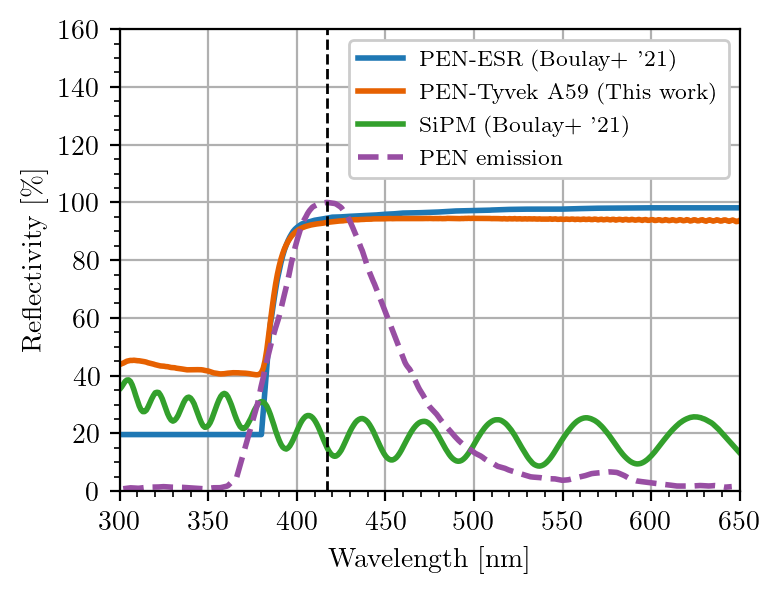

In [4]:
HC_eV = 1.2398420e-06
nm = 1e9
# From 2PAC G4DS
# photon energy in eV
wavelength = [0.1, 2.067,2.175,2.214,2.255,2.340,2.385,2.431,2.436,2.531,2.583,2.638,2.696,2.725,2.756,2.787,2.818,2.884,2.918,2.952,2.988,3.024,3.039,3.047,3.054,3.062,3.069,3.077,3.085,3.092,3.100,3.108,3.116,3.123,3.131,3.139,3.147,3.155,3.163,3.171,3.179,3.188,3.196,3.204,3.212,3.221,3.263, 8.0]
# reflectance relative to BaSO4 (0.98)
reflectance = [100.130, 100.130,99.995,99.856,99.681,99.659,99.569,99.351,99.306,99.018,98.652,98.415,98.283,98.018,97.856,97.606,97.457,97.134,96.928,96.827,96.247,95.737,95.359,95.197,95.048,94.876,94.684,94.463,94.055,93.650,93.147,92.562,91.812,90.904,89.807,88.506,86.957,85.242,83.156,80.678,77.811,74.615,71.004,67.089,62.924,58.670,20.000,20.000]

for i in range(len(wavelength)):
    wavelength[i] = HC_eV/wavelength[i] * nm
    reflectance[i] *= 0.98

# SiPM transmittance taken from G4DS master
wavelength_sipm = []
reflectance_sipm = []
with open('data/SiPM_transmittance_7deg_AstroCent.dat') as f:
    for line in f:
        data = line.split()
        if(len(data)==0):
            break
        wavelength_sipm.append(HC_eV/float(data[0])*nm)
        reflectance_sipm.append(100*(1-float(data[1])))

w_esr = []
r_esr = []
with open('data/data_esr_tyvek/PEN_ESR_Black.csv') as f:
    for count,line in enumerate(f):
        data = line.split(',')
        if(len(data)==0):
            break
        if count>0:
            w_esr.append(float(data[0]))
            r_esr.append(float(data[1]))

w_esr_mir = []
r_esr_mir = []
with open('data/data_esr_mirror_calibrated/PEN_ESR_Black_Mirror_Calibrated.csv') as f:
    for count,line in enumerate(f):
        data = line.split(',')
        if(len(data)==0):
            break
        if count>0:
            w_esr_mir.append(float(data[0]))
            r_esr_mir.append(float(data[1]))

w_tyvek = []
r_tyvek = []
with open('data/data_esr_tyvek/PEN_Tyvek_Black.csv') as f:
    for count,line in enumerate(f):
        data = line.split(',')
        if(len(data)==0):
            break
        if count>0:
            w_tyvek.append(float(data[0]))
            r_tyvek.append(float(data[1]))

plt.figure(1, figsize=(4,3))
plt.grid()
plt.minorticks_on()
plt.plot(wavelength, reflectance, label='PEN-ESR (Boulay+ \'21)')
plt.plot(w_tyvek, np.array(r_tyvek), label='PEN-Tyvek A59 (This work)')
plt.plot(wavelength_sipm, reflectance_sipm, label='SiPM (Boulay+ \'21)')
# plt.plot(w_esr, np.array(r_esr), label='PEN-ESR-Black (Princeton)')
# plt.plot(w_esr_mir, np.array(r_esr_mir), label='PEN-ESR-Black (Princeton, mirror calibrated)')
wl_list = np.linspace(w_pen_93k[-1], w_pen_93k[0], 500)
I_pen_list = I_pen(wl_list)
scale = 100/np.max(I_pen_list)
wl_peak_pen = wl_list[np.argmax(I_pen_list)]
print('PEN emission peak = {:.0f}nm'.format(wl_list[np.argmax(I_pen_list)]))
plt.plot(wl_list, I_pen_list*scale, '--', label='PEN emission')
plt.plot([wl_peak_pen, wl_peak_pen], [0, 160], 'k--', linewidth=1)

plt.legend(loc='upper right')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Reflectivity [\%]')
plt.xlim(300, 650)
plt.ylim(0, 160)
# plt.savefig('ref_esr_tyvek.png')

Notice the sharp drop at 380nm. Probably due to PEN absorption.

In [5]:
from scipy.interpolate import interp1d

esr_refl = interp1d(wavelength, reflectance)
sipm_refl = interp1d(wavelength_sipm, reflectance_sipm)
tyvek_refl = interp1d(w_tyvek, r_tyvek)

print('R_esr(417nm)={:.1f}%'.format(esr_refl(wl_peak_pen)))
print('R_tyvek(417nm)={:.1f}%'.format(tyvek_refl(wl_peak_pen)))

R_esr(417nm)=94.5%
R_tyvek(417nm)=93.1%


# SiPM PDE
From DS-20k characterization paper (in progress)

Welcome to JupyROOT 6.26/06


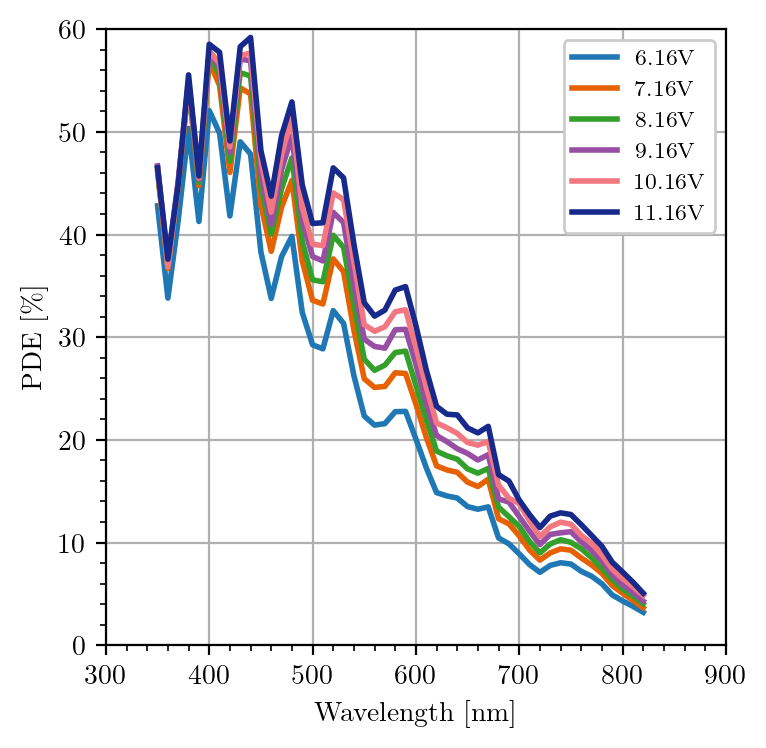

In [6]:
import ROOT

plt.figure(0,figsize=(4,4))
vov = [6.16,7.16,8.16,9.16,10.16,11.16]
pde_curves = []
for i,v in enumerate(vov):
    file = ROOT.TFile('data/PDE/PDE_{:.2f}V.root'.format(v))
    pde_curves.append(file.Get('C1111').GetPrimitive('PDEline'))
    plt.plot(np.array(pde_curves[-1].GetX()), np.array(pde_curves[-1].GetY()), label='{:.2f}V'.format(v))
plt.legend(loc='upper right')
plt.minorticks_on()
plt.grid()
plt.xlabel('Wavelength [nm]')
plt.ylabel('PDE [\%]')

pde_volt = []
for i in range(len(vov)):
    pde_volt.append(interp1d(np.array(pde_curves[i].GetX()), np.array(pde_curves[i].GetY())))

## Light yield ratio vs reflectivity

Assume monochromatic PEN emission at 417nm

$$\frac{L_{y}^{\rm Tyvek}}{L_{y}^{\rm ESR}} = \frac{1 - f_p R_p - f_w R_{\rm ESR}}{1 - f_p R_p - f_w R_{\rm Tyvek}}$$

0.8466859229834501


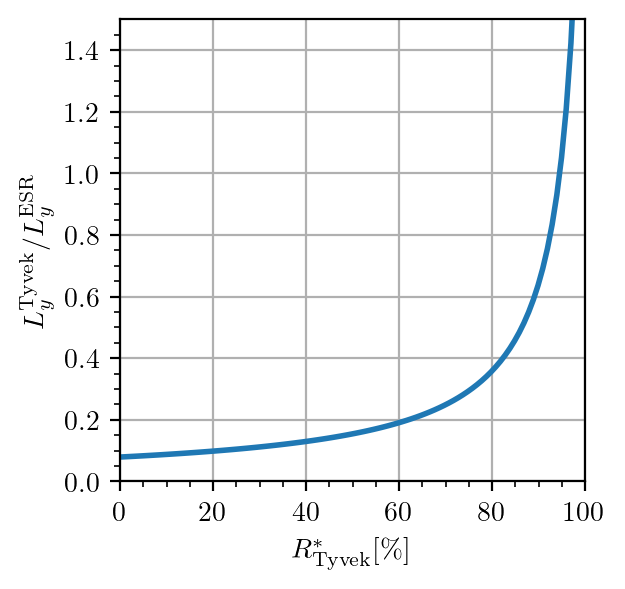

In [7]:
cm = 1.0

def ly_ratio(R_tyvek, R_esr):
    radius = 4.75*cm
    height = 4.5*cm
    Atot = 2*np.pi*radius**2 + 2*np.pi*radius*height
    fp = 3*cm*3*cm/Atot
    fw = 1-fp
    #R_esr = 0.89257
    #Rp = 0.19451 # from integral
    #Rp = 0.171 # from TPB vs PEN paper 
    # Rp = 0.05 + 0.19451*0.95**2/(1-0.05*0.19451) # including fused silica
    Rp = 0.2
    return (1-fp*Rp-fw*R_esr)/(1-fp*Rp-fw*R_tyvek)

lyr_measured = 0.1734
R_esr = esr_refl(wl_peak_pen)/100

xmin = 0
xmax = 100
xlist = np.linspace(xmin, xmax, 100)

plt.figure(0,figsize=(3,3))
plt.plot(xlist, ly_ratio(xlist/100, R_esr))
# plt.plot([xmin, xmax], [lyr_measured, lyr_measured], 'k-.')
plt.xlim(0, 100)
plt.ylim(0, 1.5)
plt.minorticks_on()
plt.grid()
plt.ylabel(r'$L_y^{\rm Tyvek}/L_y^{\rm ESR}$')
plt.xlabel(r'$R_{\rm Tyvek}^\ast [\%]$')
print(ly_ratio(tyvek_refl(wl_peak_pen)/100,R_esr))

## Light Yield
- $N_\gamma$: LAr photon yield (~40ph/keV)

- $f_w$: PEN-reflector area fraction

- $f_p$: Photon detection area fraction ($f_w+f_p=1$)

- $\varepsilon_w$: PEN wavelength shifting efficiency

- $I_w$: PEN emission spectrum

- $\epsilon_p$: SiPM PDE

- $R$: Average reflectivity ($R=f_p R_p + f_w R_w$)

- $R_p$: Fused silica-SiPM effective reflectivity

- $R_w$: PEN-reflector effective reflectivity



$$L_y = N_\gamma f_w \varepsilon_w f_p \int \frac{I_w(\lambda)\varepsilon_p(\lambda)}{1-R(\lambda)} \, d\lambda$$

In [8]:
def light_collect_eff_esr(wl, iv):
    return pde_volt[iv](wl)/100*I_pen(wl)/(1-0.0326*sipm_refl(wl)/100-(1-0.0326)*esr_refl(wl)/100)

def light_collect_eff_tyvek(wl, iv):
    return pde_volt[iv](wl)/100*I_pen(wl)/(1-0.0326*sipm_refl(wl)/100-(1-0.0326)*tyvek_refl(wl)/100)

# Project Tyvek-to-ESR light yield ratio from dry reflectivity

In [9]:
Ngamma = 40 #ph/keV
fp = 0.0326
fw = 1-fp
eps_w = 0.47
lambda_min = 350
lambda_max = 600
iv = 2 #[6,7,8,9,10,11] VoV

Ly_esr = Ngamma*fp*fw*eps_w*integrate.quad(lambda x: light_collect_eff_esr(x, iv), lambda_min, lambda_max, epsrel=1e-4, limit=10000)[0]
print('Expected ESR light yield = {:.3f} PE/keV'.format(Ly_esr))
Ly_tyvek = Ngamma*fp*fw*eps_w*integrate.quad(lambda x: light_collect_eff_tyvek(x, iv), lambda_min, lambda_max, epsrel=1e-4, limit=10000)[0]
print('Expected ESR light yield = {:.3f} PE/keV'.format(Ly_tyvek))
print('Expected Tyvek-to-ESR Ly ratio = {:.3f}'.format(Ly_tyvek/Ly_esr))

Expected ESR light yield = 3.478 PE/keV
Expected ESR light yield = 2.853 PE/keV
Expected Tyvek-to-ESR Ly ratio = 0.820


/tmp/ipykernel_339678/4084925247.py:11: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Ly_tyvek = Ngamma*fp*fw*eps_w*integrate.quad(lambda x: light_collect_eff_tyvek(x, iv), lambda_min, lambda_max, epsrel=1e-4, limit=10000)[0]


/tmp/ipykernel_339678/3271192104.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  esr_ly = np.array([integrate.quad(lambda x: light_collect_eff_esr(x, iv), lambda_min, lambda_max, epsrel=1e-4, limit=10000)[0] for iv in range(len(vov))])
/tmp/ipykernel_339678/3271192104.py:5: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  tyvek_ly = np.array([integrate.quad(lambda x: light_collect_eff_tyvek(x, iv), lambda_min, lambda_max, epsrel=1e-4, limit=10000)[0] for iv in range(len(vov))])


[0.82325759 0.82170171 0.82028294 0.81892748 0.81766664 0.81649918]
-0.0052597236956924975


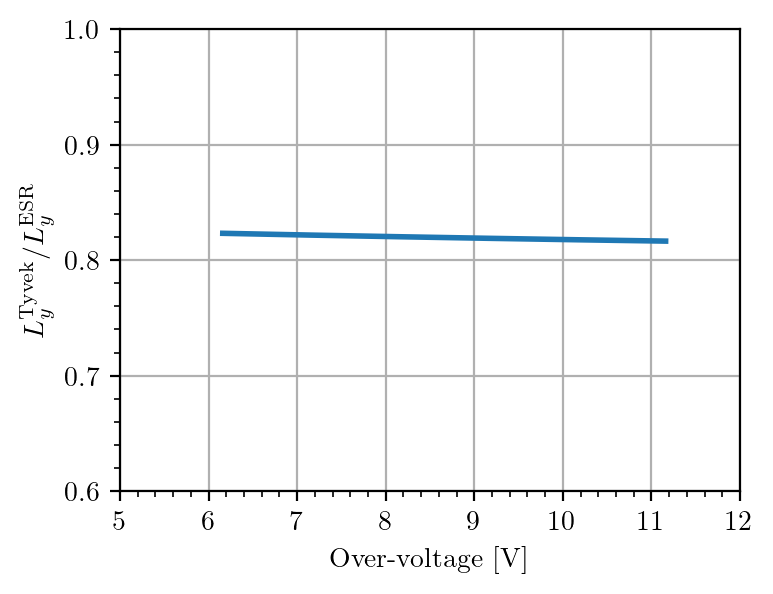

In [13]:
lambda_min = 350
lambda_max = 600

esr_ly = np.array([integrate.quad(lambda x: light_collect_eff_esr(x, iv), lambda_min, lambda_max, epsrel=1e-4, limit=10000)[0] for iv in range(len(vov))])
tyvek_ly = np.array([integrate.quad(lambda x: light_collect_eff_tyvek(x, iv), lambda_min, lambda_max, epsrel=1e-4, limit=10000)[0] for iv in range(len(vov))])
ly_ratio_dry = tyvek_ly/esr_ly
plt.plot(vov, ly_ratio_dry)
plt.xlabel(r'Over-voltage [V]')
plt.ylabel(r'$L_y^{\rm Tyvek}/L_y^{\rm ESR}$')
plt.ylim(0.6, 1.0)
plt.xlim(5, 12)
plt.minorticks_on()
plt.grid()
print(ly_ratio_dry)
print(ly_ratio_dry[3]/ly_ratio_dry[0]-1)


## PDE-VoV slope at different wavelength

Text(0, 0.5, 'PDE/PDE(6V)')

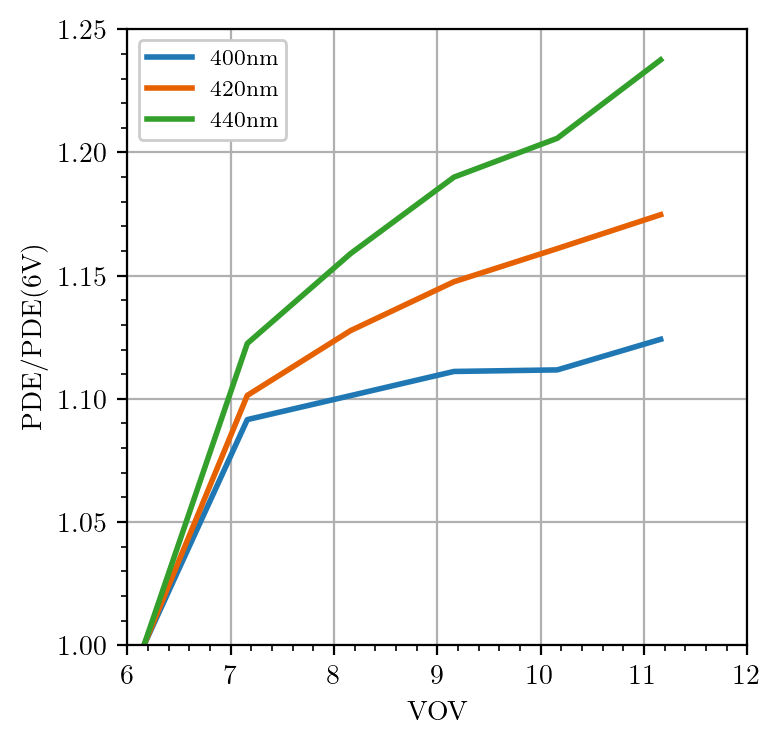

In [10]:
wl_test = [400,420,440]
plt.figure(0, figsize=(4,4))
for w in wl_test:
    plt.plot(vov, [pde_volt[iv](w)/pde_volt[0](w) for iv in range(6)], label='{:.0f}nm'.format(w))
plt.legend()
plt.minorticks_on()
plt.grid()
plt.xlabel('VOV')
plt.ylabel('PDE/PDE(6V)')

The change in PDE per volt increases with wavelength.

## A rough estimation of visible photon spectrum
Consider two scenarios:
1. "Indirect": Photons reflect many times before getting the SiPMs. Light below 380nm will be suppressed.  Use the light yield model with ESR dry reflectivity spectrum
$$L_y(\lambda) \propto \frac{\epsilon_{wls}(\lambda) \epsilon_p(\lambda)}{1-R(\lambda)}$$
2. "Direct": Photons do not reflect ($R(\lambda)=0$). Some light below 380nm can make it to the SiPMs.
$$L_y(\lambda) \propto \epsilon_{wls}(\lambda) \epsilon_p(\lambda)$$

The Tyvek chamber has very low reflectivity, so it should be close to the direct scenario. The ESR chamber corresponds to the indirect scenario.

In [17]:
def light_collect_eff_direct(wl, iv):
    return pde_volt[iv](wl)/100*I_pen(wl)


Text(0, 0.5, 'Ly [a.u.]')

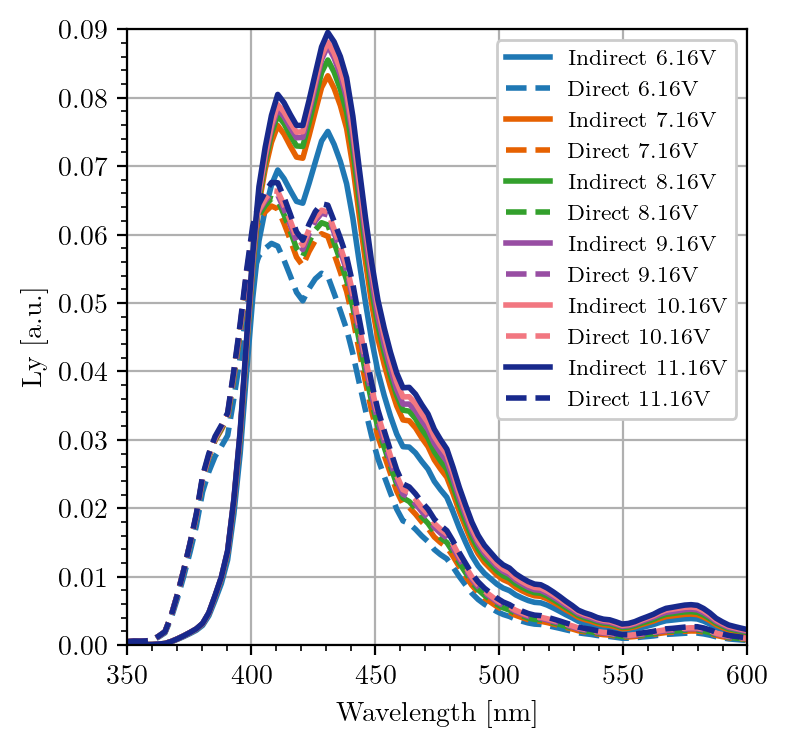

In [19]:
wl_list = np.linspace(350, 600, 100)
plt.figure(0, figsize=(4,4))
for i in range(len(vov)):
    plt.plot(wl_list, light_collect_eff_esr(wl_list, i), 'C{}-'.format(i), label='Indirect {:.2f}V'.format(vov[i]))
    plt.plot(wl_list, light_collect_eff_direct(wl_list, i)*10, 'C{}--'.format(i), label='Direct {:.2f}V'.format(vov[i]))
plt.legend(loc='upper right')
plt.minorticks_on()
plt.grid()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Ly [a.u.]')


The direct scenario sees more blue light and less red light than the indirect scenario. Therefore, the light yield should increase more slowly for the direct scenario due to the smaller PDE change per volt.

## Integrated light yield as a function of over-voltage
Use 6VoV as reference voltage.

/tmp/ipykernel_339678/1367510509.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  indirect_ly = np.array([integrate.quad(lambda x: light_collect_eff_esr(x, iv), lambda_min, lambda_max, epsrel=1e-4, limit=500)[0] for iv in range(len(vov))])


-0.0159316082444928


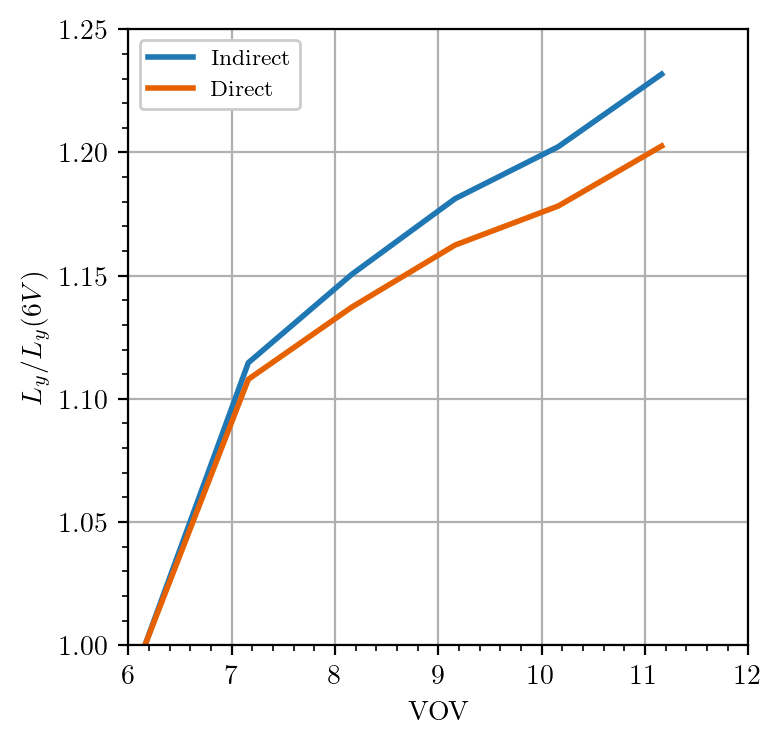

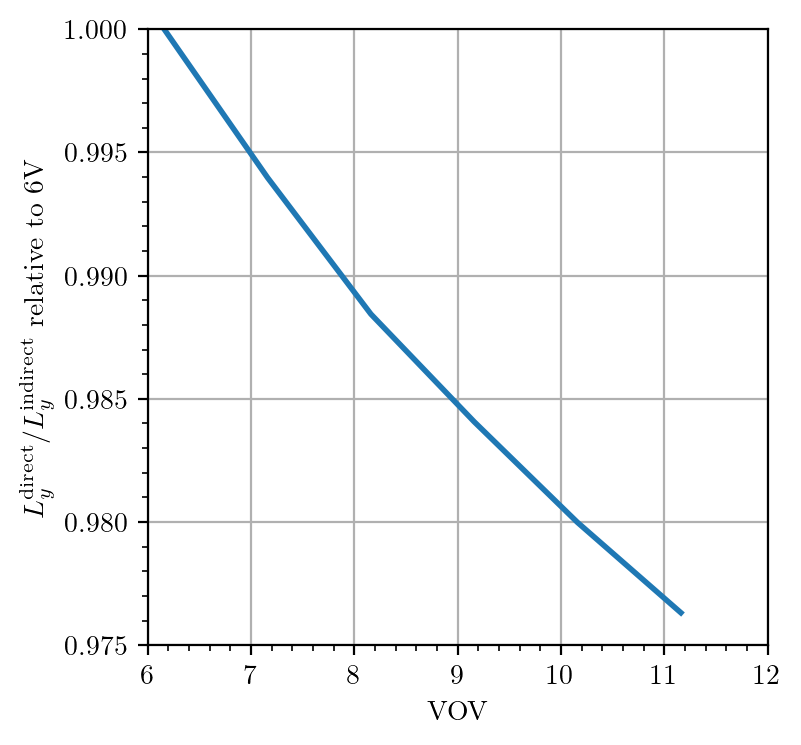

In [20]:
lambda_min = 350
lambda_max = 600

indirect_ly = np.array([integrate.quad(lambda x: light_collect_eff_esr(x, iv), lambda_min, lambda_max, epsrel=1e-4, limit=500)[0] for iv in range(len(vov))])
direct_ly = np.array([integrate.quad(lambda x: light_collect_eff_direct(x, iv), lambda_min, lambda_max, epsrel=1e-4, limit=500)[0] for iv in range(len(vov))])

plt.figure(0,figsize=(4,4))
plt.plot(vov, indirect_ly/indirect_ly[0], label='Indirect')
plt.plot(vov, direct_ly/direct_ly[0], label='Direct')
plt.legend()
plt.minorticks_on()
plt.grid()
plt.xlabel('VOV')
plt.ylabel(r'$L_y/L_y(6V)$')


ly_ratio_direct = direct_ly/indirect_ly
plt.figure(1,figsize=(4,4))
plt.plot(vov, ly_ratio_direct/ly_ratio_direct[0])
plt.minorticks_on()
plt.grid()
plt.xlabel('VOV')
plt.ylabel(r'$L_y^{\rm direct}/L_y^{\rm indirect}$ relative to 6V')
print(ly_ratio_direct[3]/ly_ratio_direct[0]-1)

From 6V to 9V, $L_y^{\rm direct}/L_y^{\rm indirect}$ decreases by 1.5%. The observed Tyvek-to-ESR light yield ratio decreases by 2.8%.